<a href="https://colab.research.google.com/github/Nihar05032/AIDS/blob/main/LSTM_EPX5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3564 - mae: 0.5343
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mae: 0.0825
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0496e-04 - mae: 0.0237
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5514e-04 - mae: 0.0200
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6918e-04 - mae: 0.0189
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5334e-04 - mae: 0.0163
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0491e-04 - mae: 0.0122
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0762e-04 - mae: 0.0089
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8447e-05 - mae: 0.0075
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0641e-05 - mae: 0.0060
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6640e-05 - mae: 0.0044
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5317e-05 - mae: 0.0034
Epoch 13/

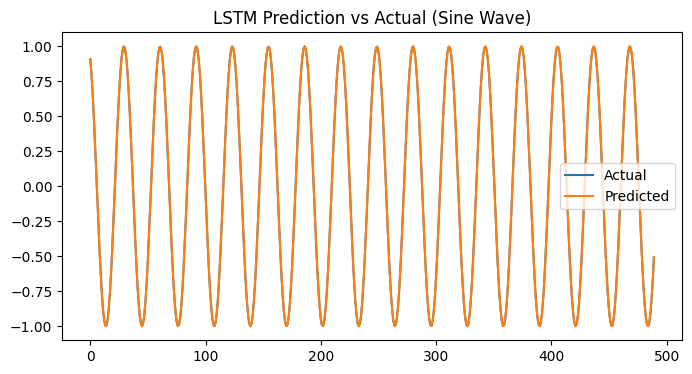

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Step 2: Define hyperparameters
TIME_STEPS = 10 # Number of time steps in each sequence
FEATURES = 1 # Number of features per step
UNITS = 50 # LSTM units
EPOCHS = 20 # Training epochs
BATCH_SIZE = 8 # Batch size
LEARNING_RATE = 0.001
# Step 3: Create sample sequential data (sine wave)
x = np.linspace(0, 100, 500)
y = np.sin(x)
# Prepare data into sequences
X, Y = [], []
for i in range(len(y) - TIME_STEPS):
 X.append(y[i:i+TIME_STEPS])
 Y.append(y[i+TIME_STEPS])
X = np.array(X)
Y = np.array(Y)
# Reshape input for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], FEATURES))
# Step 4: Create the LSTM model
model = Sequential([
 LSTM(UNITS, input_shape=(TIME_STEPS, FEATURES)),
 Dense(1)
])
# Step 5: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
 loss='mse',
 metrics=['mae'])
# Step 6: Train the model
history = model.fit(X, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
# Step 7: Evaluate model performance
loss, mae = model.evaluate(X, Y, verbose=0)
print(f"Model Evaluation — Loss: {loss:.4f}, MAE: {mae:.4f}")
# Step 8: Make predictions
predictions = model.predict(X)
# Optional — visualize predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(Y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("LSTM Prediction vs Actual (Sine Wave)")
plt.legend()
plt.show()
